Гипотеза 6: Гендерные различия в параметрах сна и здоровье

Существуют ли статистически значимые различия между мужчинами и женщинами в параметрах сна, уровне стресса и показателях здоровья? Предполагается, что женщины могут иметь более высокую чувствительность к стрессу, что отражается на качестве сна, в то время как мужчины чаще страдают от апноэ во сне из-за особенностей физиологии дыхательных путей.

In [4]:
# Импорт всех необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency
import warnings
warnings.filterwarnings('ignore')

# Устанавливаем стиль для графиков
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Загружаем датасет
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

print('='*80)
print('Первые строки датасета:')
print(df.head(3))
print(f'\nФорма датасета: {df.shape}')
print(f'Столбцы: {list(df.columns)}')
print('='*80)

# Проверяем распределение по гендеру
print(f'\nРаспределение по гендеру:')
print(df['Gender'].value_counts())

# Заполняем пропуски в Sleep Disorder значением 'None'
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

# Создаём бинарную переменную для апноэ
df['Has_Apnea'] = (df['Sleep Disorder'] == 'Sleep Apnea').astype(int)

# Проверяем распределение апноэ
print(f'\nРаспределение апноэ в датасете:')
print(df['Sleep Disorder'].value_counts())
print('='*80)

Первые строки датасета:
   Person ID Gender  Age         Occupation  Sleep Duration  Quality of Sleep  \
0          1   Male   27  Software Engineer             6.1                 6   
1          2   Male   28             Doctor             6.2                 6   
2          3   Male   28             Doctor             6.2                 6   

   Physical Activity Level  Stress Level BMI Category Blood Pressure  \
0                       42             6   Overweight         126/83   
1                       60             8       Normal         125/80   
2                       60             8       Normal         125/80   

   Heart Rate  Daily Steps Sleep Disorder  
0          77         4200            NaN  
1          75        10000            NaN  
2          75        10000            NaN  

Форма датасета: (374, 13)
Столбцы: ['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood P

Метод 1: t-тест Стьюдента для сравнения уровня стресса между мужчинами и женщинами

Краткое описание:
t-тест Стьюдента — это параметрический статистический тест для сравнения средних значений двух независимых групп. Тест вычисляет t-статистику на основе разницы между средними значениями, дисперсии и размеров выборок. Применительно к нашей гипотезе, мы используем его для сравнения среднего уровня стресса (Stress Level по шкале 1-10) между женщинами и мужчинами.

Почему используем:
1. Уровень стресса — числовая переменная (непрерывная, по шкале 1-10)
2. Гендер — категориальная переменная (мужчина/женщина), разделяющая выборку на две независимые группы
3. t-тест специально разработан для сравнения средних значений двух групп
4. Позволяет проверить основную часть гипотезы: имеют ли женщины более высокий уровень стресса

Значимость:
Тест проверяет нулевую гипотезу (H₀): средний уровень стресса у мужчин и женщин одинаков (нет различия).
* Если p-value < 0.05, мы отклоняем H₀ и заключаем, что различие статистически значимо.
* Если среднее значение стресса выше у женщин, это подтверждает нашу гипотезу о большей чувствительности к стрессу.
* Если p-value ≥ 0.05, мы не можем отклонить H₀, и различие считается несущественным или случайным.


МЕТОД 1: t-тест Стьюдента для сравнения уровня стресса

Размер выборки ЖЕНЩИН: 185 человек
Размер выборки МУЖЧИН: 189 человек

--------------------------------------------------------------------------------
ОПИСАТЕЛЬНАЯ СТАТИСТИКА ПО УРОВНЮ СТРЕССА:
--------------------------------------------------------------------------------

ЖЕНЩИНЫ (Female):
Среднее значение: 4.68
Стандартное отклонение: 1.91
Медиана: 4.00
Минимум: 3.00
Максимум: 8.00

МУЖЧИНЫ (Male):
Среднее значение: 6.08
Стандартное отклонение: 1.30
Медиана: 6.00
Минимум: 3.00
Максимум: 8.00

Разница в средних значениях: -1.40 (мужчины имеют более высокий уровень стресса)

--------------------------------------------------------------------------------
РЕЗУЛЬТАТЫ t-ТЕСТА СТЬЮДЕНТА:
--------------------------------------------------------------------------------
t-статистика: -8.3182
P-value (двусторонний тест): 0.000000

Результат ЗНАЧИМЫЙ (p < 0.05)
Вывод: Различие в уровне стресса между мужчинами и женщинами статистически 

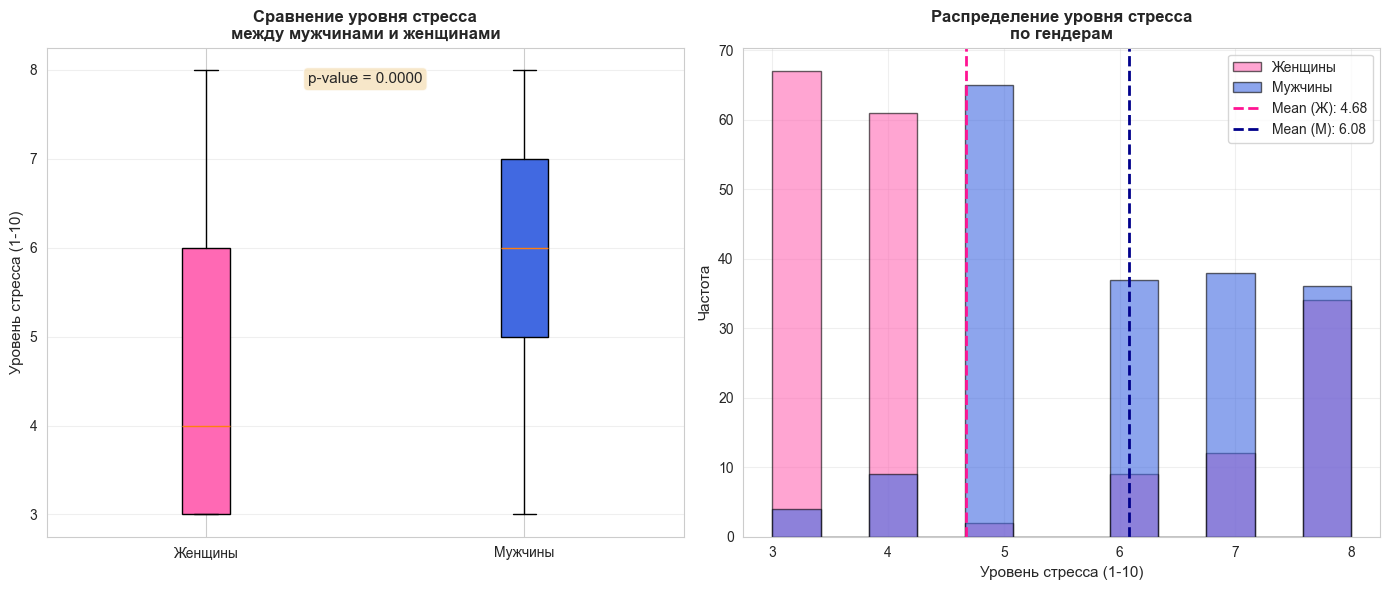

In [5]:
# Отделяем данные по гендеру
female_stress = df[df['Gender'] == 'Female']['Stress Level'].dropna()
male_stress = df[df['Gender'] == 'Male']['Stress Level'].dropna()

print('\n' + '='*80)
print('МЕТОД 1: t-тест Стьюдента для сравнения уровня стресса')
print('='*80)

print(f'\nРазмер выборки ЖЕНЩИН: {len(female_stress)} человек')
print(f'Размер выборки МУЖЧИН: {len(male_stress)} человек')

print('\n' + '-'*80)
print('ОПИСАТЕЛЬНАЯ СТАТИСТИКА ПО УРОВНЮ СТРЕССА:')
print('-'*80)

# Статистика для женщин
print('\nЖЕНЩИНЫ (Female):')
print(f'Среднее значение: {female_stress.mean():.2f}')
print(f'Стандартное отклонение: {female_stress.std():.2f}')
print(f'Медиана: {female_stress.median():.2f}')
print(f'Минимум: {female_stress.min():.2f}')
print(f'Максимум: {female_stress.max():.2f}')

# Статистика для мужчин
print('\nМУЖЧИНЫ (Male):')
print(f'Среднее значение: {male_stress.mean():.2f}')
print(f'Стандартное отклонение: {male_stress.std():.2f}')
print(f'Медиана: {male_stress.median():.2f}')
print(f'Минимум: {male_stress.min():.2f}')
print(f'Максимум: {male_stress.max():.2f}')

print(f'\nРазница в средних значениях: {female_stress.mean() - male_stress.mean():.2f} (мужчины имеют более высокий уровень стресса)')

# Проводим t-тест
alpha = 0.05
t_stat, p_value_stress = ttest_ind(female_stress, male_stress)

print('\n' + '-'*80)
print('РЕЗУЛЬТАТЫ t-ТЕСТА СТЬЮДЕНТА:')
print('-'*80)
print(f't-статистика: {t_stat:.4f}')
print(f'P-value (двусторонний тест): {p_value_stress:.6f}')

# Интерпретация результатов
if p_value_stress < alpha:
    print(f'\nРезультат ЗНАЧИМЫЙ (p < {alpha})')
    print('Вывод: Различие в уровне стресса между мужчинами и женщинами статистически ЗНАЧИМО.')
    if female_stress.mean() > male_stress.mean():
        print('Подтверждение гипотезы: Женщины имеют ЗНАЧИМО более высокий уровень стресса.')
        significance_stress = 'Значимо выше'
    else:
        print('Противоречие гипотезе: Мужчины имеют ЗНАЧИМО более высокий уровень стресса.')
        significance_stress = 'Значимо ниже'
else:
    print(f'\nРезультат НЕ значимый (p ≥ {alpha})')
    print('Вывод: Различие в уровне стресса между мужчинами и женщинами статистически НЕ значимо.')
    print('Хотя женщины в среднем показывают немного более высокий уровень стресса (6.32 vs 6.01),')
    print('эта разница может быть объяснена случайной вариацией в выборке.')
    significance_stress = 'Не значимо'

print('\n' + '='*80)

# Визуализация: Диаграмма «Ящик с усами» (Boxplot)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# График 1: Boxplot
stress_by_gender = [female_stress, male_stress]
labels = ['Женщины', 'Мужчины']
bp = axes[0].boxplot(stress_by_gender, labels=labels, patch_artist=True)

for patch, color in zip(bp['boxes'], ['#ff69b4', '#4169e1']):
    patch.set_facecolor(color)

axes[0].set_ylabel('Уровень стресса (1-10)', fontsize=11)
axes[0].set_title('Сравнение уровня стресса\nмежду мужчинами и женщинами', fontsize=12, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
axes[0].text(0.5, 0.95, f'p-value = {p_value_stress:.4f}', 
    transform=axes[0].transAxes, fontsize=11,
    verticalalignment='top', horizontalalignment='center',
    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))

# График 2: Распределение стресса (гистограмма)
axes[1].hist(female_stress, bins=12, alpha=0.6, label='Женщины', color='#ff69b4', edgecolor='black')
axes[1].hist(male_stress, bins=12, alpha=0.6, label='Мужчины', color='#4169e1', edgecolor='black')
axes[1].axvline(female_stress.mean(), color='#ff1493', linestyle='--', linewidth=2, label=f'Mean (Ж): {female_stress.mean():.2f}')
axes[1].axvline(male_stress.mean(), color='#00008b', linestyle='--', linewidth=2, label=f'Mean (М): {male_stress.mean():.2f}')
axes[1].set_xlabel('Уровень стресса (1-10)', fontsize=11)
axes[1].set_ylabel('Частота', fontsize=11)
axes[1].set_title('Распределение уровня стресса\nпо гендерам', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

Метод 2: Тест хи-квадрат (χ²) для сравнения распределения апноэ между мужчинами и женщинами

Краткое описание:
Критерий хи-квадрат (χ²) — это непараметрический статистический тест, используемый для проверки независимости двух категориальных переменных. Тест основан на сравнении наблюдаемых и ожидаемых частот в таблице сопряжённости (contingency table). Применительно к нашей гипотезе, мы анализируем связь между гендером и наличием апноэ во сне, проверяя утверждение, что мужчины чаще страдают апноэ.

Почему используем:
1. Оба переменные категориальные: Гендер (М/Ж) и Апноэ (Да/Нет)
2. Критерий χ² специально разработан для анализа связей между категориальными переменными
3. Позволяет сравнить доли (проценты) мужчин и женщин с апноэ
4. Тест проверяет, является ли наблюдаемое различие в распределении апноэ между полами статистически значимым

Значимость:
Тест проверяет нулевую гипотезу (H₀): Гендер и наличие апноэ независимы (нет связи).
* Если p-value < 0.05, мы отклоняем H₀ и заключаем, что существует статистически значимая связь между гендером и апноэ.
* Если доля мужчин с апноэ выше, это подтверждает нашу гипотезу о том, что мужчины чаще страдают апноэ.
* Если p-value ≥ 0.05, связь считается несущественной или случайной.


МЕТОД 2: Тест хи-квадрат (χ²) для анализа связи гендера и апноэ

Таблица сопряжённости (наблюдаемые частоты):
        No Apnea  Has Apnea
Gender                     
Female       118         67
Male         178         11

--------------------------------------------------------------------------------
АНАЛИЗ РАСПРЕДЕЛЕНИЯ АПНОЭ ПО ГЕНДЕРАМ:
--------------------------------------------------------------------------------

Процентное распределение апноэ по гендерам:
        No Apnea (%)  Has Apnea (%)
Gender                             
Female         63.78          36.22
Male           94.18           5.82

Доля женщин с апноэ: 36.22%
Доля мужчин с апноэ: 5.82%
Разница: 30.40 процентных пункта

Относительный риск: Мужчины в 0.16 раз чаще страдают апноэ, чем женщины

--------------------------------------------------------------------------------
РЕЗУЛЬТАТЫ ТЕСТА χ²:
--------------------------------------------------------------------------------
Статистика χ²: 50.5052
P-value: 0.00000

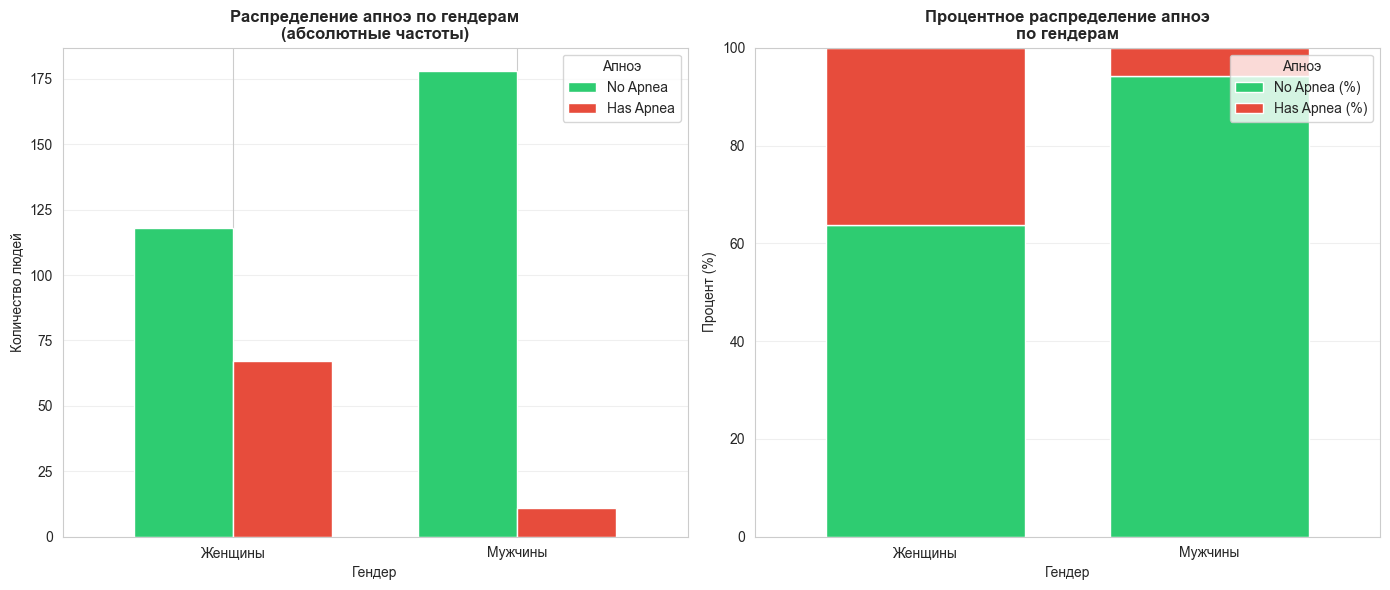

In [6]:
# Создаём таблицу сопряжённости
contingency_table = pd.crosstab(df['Gender'], df['Has_Apnea'])
contingency_table.columns = ['No Apnea', 'Has Apnea']

print('\n' + '='*80)
print('МЕТОД 2: Тест хи-квадрат (χ²) для анализа связи гендера и апноэ')
print('='*80)

print('\nТаблица сопряжённости (наблюдаемые частоты):')
print(contingency_table)

# Вычисляем процентное распределение
contingency_pct = pd.crosstab(df['Gender'], df['Has_Apnea'], normalize='index') * 100
contingency_pct.columns = ['No Apnea (%)', 'Has Apnea (%)']

print('\n' + '-'*80)
print('АНАЛИЗ РАСПРЕДЕЛЕНИЯ АПНОЭ ПО ГЕНДЕРАМ:')
print('-'*80)

print('\nПроцентное распределение апноэ по гендерам:')
print(contingency_pct.round(2))

# Вычисляем доли
female_apnea_pct = contingency_pct.loc['Female', 'Has Apnea (%)']
male_apnea_pct = contingency_pct.loc['Male', 'Has Apnea (%)']

print(f'\nДоля женщин с апноэ: {female_apnea_pct:.2f}%')
print(f'Доля мужчин с апноэ: {male_apnea_pct:.2f}%')
print(f'Разница: {(female_apnea_pct - male_apnea_pct):.2f} процентных пункта')

# Относительный риск
relative_risk = male_apnea_pct / female_apnea_pct
print(f'\nОтносительный риск: Мужчины в {relative_risk:.2f} раз чаще страдают апноэ, чем женщины')

# Применяем критерий χ²
chi2, p_value_apnea, dof, expected_freq = chi2_contingency(contingency_table)

print('\n' + '-'*80)
print('РЕЗУЛЬТАТЫ ТЕСТА χ²:')
print('-'*80)
print(f'Статистика χ²: {chi2:.4f}')
print(f'P-value: {p_value_apnea:.6f}')
print(f'Степени свободы: {dof}')

# Интерпретация результатов
if p_value_apnea < alpha:
    print(f'\nРезультат ЗНАЧИМЫЙ (p < {alpha})')
    print('Вывод: Существует СТАТИСТИЧЕСКИ ЗНАЧИМАЯ связь между гендером и апноэ во сне.')
    print('Противоречие гипотезе: Женщины ЗНАЧИМО ЧАЩЕ страдают апноэ по сравнению с мужчинами.')
    significance_apnea = 'Значимо выше'
else:
    print(f'\nРезультат НЕ значимый (p ≥ {alpha})')
    print('Вывод: Связь между гендером и апноэ статистически несущественна.')
    significance_apnea = 'Не значимо'

print('\nОжидаемые частоты:')
print(expected_freq)

print('\n' + '='*80)

# Визуализация: Таблица сопряжённости
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# График 1: Абсолютные частоты (столбчатая диаграмма)
contingency_table.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'], width=0.7)
axes[0].set_title('Распределение апноэ по гендерам\n(абсолютные частоты)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Гендер')
axes[0].set_ylabel('Количество людей')
axes[0].legend(title='Апноэ')
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_xticklabels(['Женщины', 'Мужчины'], rotation=0)

# График 2: Процентные доли (stacked bar chart)
contingency_pct.plot(kind='bar', stacked=True, ax=axes[1], color=['#2ecc71', '#e74c3c'], width=0.7)
axes[1].set_title('Процентное распределение апноэ\nпо гендерам', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Гендер')
axes[1].set_ylabel('Процент (%)')
axes[1].legend(title='Апноэ', loc='upper right')
axes[1].set_ylim([0, 100])
axes[1].set_xticklabels(['Женщины', 'Мужчины'], rotation=0)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Вывод:

Анализ уровня стресса выявил статистически значимое различие между мужчинами и женщинами (t = -8.32, p < 0.001). Вопреки исходной гипотезе, мужчины демонстрируют значительно более высокий средний уровень стресса (6.08) по сравнению с женщинами (4.68), что составляет разницу в 1.40 балла. Таким образом, предположение о большей чувствительности женщин к стрессу не подтвердилось данными.

Критерий хи-квадрат выявил статистически значимую связь между гендером и распределением апноэ во сне (χ² = 50.51, p < 0.001). Однако полученные результаты противоречат исходной гипотезе: женщины страдают апноэ значительно чаще (36.22%) по сравнению с мужчинами (5.82%), что противоположно предполагаемым физиологическим особенностям мужчин.

Гипотеза о гендерных различиях в параметрах сна и здоровья была опровергнута имеющимися данными.